In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
model_data = pd.read_csv('modeldata.csv')
model_data.head()

,totalrev,population,unemployment,gini,tax_sales,crime_rate_per1000,income_capita,bachelor_degree,highschool,tobacco_smokers,cannabis_rev,poverty,median_age,price,alcolism_rate
0,22556106,36569,0.148,0.4410,7.75,8.002088,23956,20.3,79.5,14.4,5.877553e+05,35.4,33.8,7.29,17
1,26997269,19975,0.068,0.5022,9.50,1.024890,32469,31.8,78.7,11.0,3.727934e+06,5.0,37.0,3.01,17
2,296987199,78262,0.056,0.4624,10.75,2.053050,44283,46.0,88.0,10.0,1.997090e+07,8.1,38.0,7.29,17
3,39261804,20542,0.036,0.4624,10.75,1.991734,44283,46.0,88.0,10.0,5.241908e+06,9.4,38.0,7.29,17
4,149426535,82182,0.079,0.5022,10.25,1.897757,32469,31.8,78.7,11.0,1.533763e+07,14.0,37.0,3.01,17


In [3]:
model_data.shape

(447, 15)

In [4]:
# Trying feature engineering to make the model better understand the data
model_data['revenue_per_capita'] = model_data['totalrev'] / model_data['population']
model_data.head()

,totalrev,population,unemployment,gini,tax_sales,crime_rate_per1000,income_capita,bachelor_degree,highschool,tobacco_smokers,cannabis_rev,poverty,median_age,price,alcolism_rate,revenue_per_capita
0,22556106,36569,0.148,0.4410,7.75,8.002088,23956,20.3,79.5,14.4,5.877553e+05,35.4,33.8,7.29,17,616.809483
1,26997269,19975,0.068,0.5022,9.50,1.024890,32469,31.8,78.7,11.0,3.727934e+06,5.0,37.0,3.01,17,1351.552891
2,296987199,78262,0.056,0.4624,10.75,2.053050,44283,46.0,88.0,10.0,1.997090e+07,8.1,38.0,7.29,17,3794.781618
3,39261804,20542,0.036,0.4624,10.75,1.991734,44283,46.0,88.0,10.0,5.241908e+06,9.4,38.0,7.29,17,1911.294129
4,149426535,82182,0.079,0.5022,10.25,1.897757,32469,31.8,78.7,11.0,1.533763e+07,14.0,37.0,3.01,17,1818.239213


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (Representative Population Values):
 [[  37699.18644068]
 [3853323.        ]
 [ 920309.5       ]
 [ 118251.66666667]
 [ 471405.6       ]
 [1371832.        ]
 [  10589.25568182]
 [ 187680.66666667]
 [  75440.85897436]
 [ 311798.83333333]]


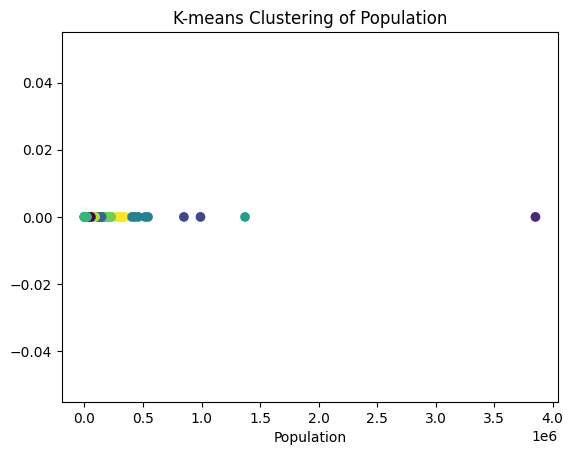

In [5]:
from sklearn.cluster import KMeans
import numpy as np

population_values = model_data['population'].values.reshape(-1, 1)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(population_values)

labels = kmeans.labels_

# Adding population clusters as a new column in the original DataFrame
model_data['population_group'] = labels

# Print the cluster centers (representative population values for each cluster)
print("Cluster Centers (Representative Population Values):\n", kmeans.cluster_centers_)

# Visualizing the clusters using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(model_data['population'], np.zeros(len(model_data)), c=labels, cmap='viridis')
plt.xlabel('Population')
plt.title('K-means Clustering of Population')
plt.show()

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (Representative Revenue Values):
 [[1.24404968e+08]
 [1.75638699e+10]
 [1.29562176e+10]
 [1.98168900e+09]
 [6.11995967e+08]
 [2.70637771e+09]
 [2.80488381e+08]
 [1.17364272e+09]
 [3.76778794e+09]
 [3.10056930e+07]]


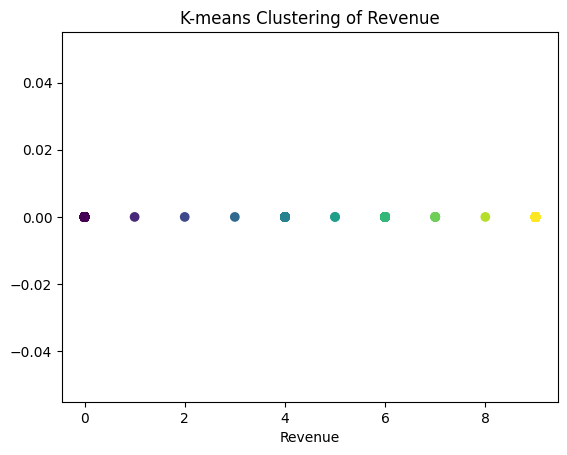

In [6]:
from sklearn.cluster import KMeans
import numpy as np

revenue_values = model_data['totalrev'].values.reshape(-1, 1)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(revenue_values)

labels = kmeans.labels_

# Adding totalrev clusters as a new column in the original DataFrame
model_data['revenue_group'] = labels

# Print the cluster centers (representative values for each cluster)
print("Cluster Centers (Representative Revenue Values):\n", kmeans.cluster_centers_)

# Visualizing the clusters using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(model_data['revenue_group'], np.zeros(len(model_data)), c=labels, cmap='viridis')
plt.xlabel('Revenue')
plt.title('K-means Clustering of Revenue')
plt.show()

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (Representative Violence Values):
 [[ 3.69187561]
 [12.56573452]
 [ 1.47139476]
 [ 6.71464199]
 [20.31577032]]


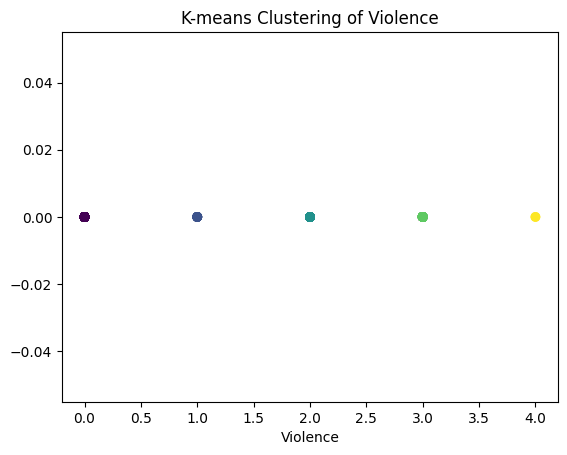

In [7]:
from sklearn.cluster import KMeans
import numpy as np

violence_values = model_data['crime_rate_per1000'].values.reshape(-1, 1)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(violence_values)

labels = kmeans.labels_

# Adding totalrev clusters as a new column in the original DataFrame
model_data['violence_group'] = labels

# Print the cluster centers (representative values for each cluster)
print("Cluster Centers (Representative Violence Values):\n", kmeans.cluster_centers_)

# Visualizing the clusters using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(model_data['violence_group'], np.zeros(len(model_data)), c=labels, cmap='viridis')
plt.xlabel('Violence')
plt.title('K-means Clustering of Violence')
plt.show()

In [8]:
# Data is continuous, I can´t oversample it, so I will focus on normalization and appropriate models 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(model_data)

model_data_scaled = scaler.transform(model_data)
model_data = pd.DataFrame(model_data_scaled, columns=model_data.columns)
model_data.head()

,totalrev,population,unemployment,gini,tax_sales,crime_rate_per1000,income_capita,bachelor_degree,highschool,tobacco_smokers,cannabis_rev,poverty,median_age,price,alcolism_rate,revenue_per_capita,population_group,revenue_group,violence_group
0,0.001228,0.009413,0.554307,0.347864,0.005391,0.361872,0.095835,0.150110,0.416667,0.451282,0.000765,0.596965,0.119048,1.000000,0.142857,0.004401,0.000000,1.000000,0.75
1,0.001480,0.005106,0.254682,0.881430,0.024259,0.046348,0.223990,0.403974,0.384921,0.276923,0.005132,0.084317,0.271429,0.305195,0.142857,0.010789,0.666667,1.000000,0.50
2,0.016853,0.020234,0.209738,0.534438,0.037736,0.092843,0.401840,0.717439,0.753968,0.225641,0.027720,0.136594,0.319048,1.000000,0.142857,0.032029,0.888889,0.666667,0.50
3,0.002179,0.005254,0.134831,0.534438,0.037736,0.090071,0.401840,0.717439,0.753968,0.225641,0.007237,0.158516,0.319048,1.000000,0.142857,0.015655,0.666667,1.000000,0.50
4,0.008451,0.021251,0.295880,0.881430,0.032345,0.085821,0.223990,0.403974,0.384921,0.276923,0.021277,0.236088,0.271429,0.305195,0.142857,0.014846,0.888889,0.000000,0.50


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Splitting the data into training and testing sets
X = model_data.drop('cannabis_rev', axis=1)  
y = model_data['cannabis_rev'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Testing in different models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error (MSE):", mse_rf)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Mean Squared Error (MSE):", mse_dt)


Random Forest Mean Squared Error (MSE): 7.326642537299323e-05
Decision Tree Mean Squared Error (MSE): 6.77381522344762e-05


In [10]:
from sklearn.metrics import r2_score

# Calculating R-squared score
r2 = r2_score(y_test, y_pred_rf)
print("Random forest R-squared score:", r2)
r2 = r2_score(y_test, y_pred_dt)
print("Decision Tree R-squared score:", r2)

Random forest R-squared score: 0.5948140770842931
Decision Tree R-squared score: 0.6253871321003744


In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

# Checking feature importances
importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

num_feats = 23
top_features = feature_importances_df.head(num_feats)
print(top_features)

               Feature  Importance
0             totalrev    0.534266
1           population    0.360949
9      tobacco_smokers    0.018383
6        income_capita    0.012666
15    population_group    0.009364
13       alcolism_rate    0.009303
10             poverty    0.007347
5   crime_rate_per1000    0.007033
14  revenue_per_capita    0.005599
2         unemployment    0.005410
11          median_age    0.005242
7      bachelor_degree    0.004757
8           highschool    0.004746
16       revenue_group    0.004457
4            tax_sales    0.003928
3                 gini    0.003428
12               price    0.002279
17      violence_group    0.000841


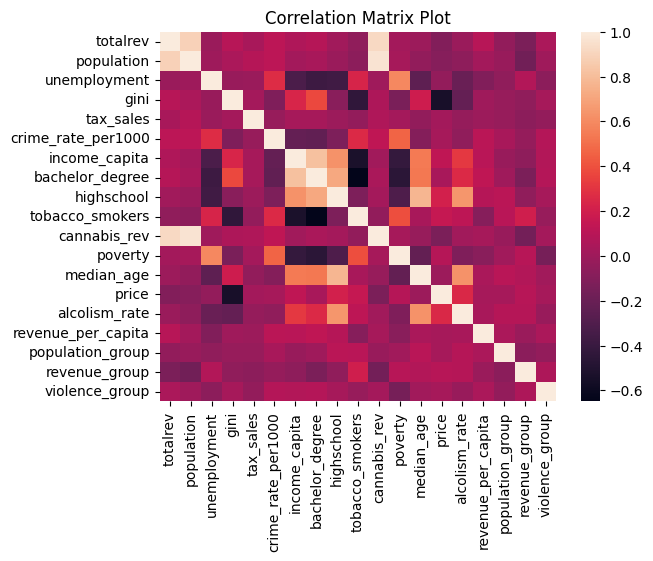

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = model_data.corr()
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix Plot')
plt.show()


In [13]:
model_data.shape

(447, 19)

In [57]:
# Testing Ensembling method
from sklearn.tree import DecisionTreeRegressor

max_depth = 7

tree_reg1 = DecisionTreeRegressor(max_depth=max_depth)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=7)

In [58]:
importances = tree_reg1.feature_importances_
feature_names = X.columns
importance_list = list(zip(feature_names, importances))
sorted_importance_list = sorted(importance_list, key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importance_list:
    print(f"{feature}: {importance}")

totalrev: 0.8931469222866455
tobacco_smokers: 0.04547446227765362
population: 0.04209638767801325
population_group: 0.007516543362384424
price: 0.002998378580238846
highschool: 0.002890358551839096
unemployment: 0.002554092263960299
poverty: 0.0010934486240347615
income_capita: 0.0007859087376008877
median_age: 0.0005989195791353057
revenue_per_capita: 0.0005305215305525388
bachelor_degree: 0.00023504636983729757
gini: 7.900162187097884e-05
tax_sales: 8.536233160343351e-09
crime_rate_per1000: 0.0
alcolism_rate: 0.0
revenue_group: 0.0
violence_group: 0.0


In [59]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=max_depth)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=7)

In [60]:
importances = tree_reg2.feature_importances_
feature_names = X.columns
importance_list = list(zip(feature_names, importances))
sorted_importance_list = sorted(importance_list, key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importance_list:
    print(f"{feature}: {importance}")

population: 0.1777361189337418
income_capita: 0.1580683445530927
tax_sales: 0.1109430924207962
totalrev: 0.10618351224841838
tobacco_smokers: 0.08699397304617282
poverty: 0.08497445902900941
alcolism_rate: 0.08312312664718145
highschool: 0.06893887680171644
revenue_per_capita: 0.03345220124612207
gini: 0.02689765957491762
revenue_group: 0.01901674320495971
unemployment: 0.01700013867138209
crime_rate_per1000: 0.01609679882997057
median_age: 0.005156912346172992
bachelor_degree: 0.004866940828845752
population_group: 0.0005505132177291714
violence_group: 5.883997708124028e-07
price: 0.0


In [61]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=max_depth)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=7)

In [62]:
importances = tree_reg3.feature_importances_
feature_names = X.columns
importance_list = list(zip(feature_names, importances))
sorted_importance_list = sorted(importance_list, key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importance_list:
    print(f"{feature}: {importance}")

population: 0.2541921084252334
revenue_per_capita: 0.13420912773742225
alcolism_rate: 0.10398974767519271
tax_sales: 0.07661834508525153
income_capita: 0.072041638619097
poverty: 0.06721521369693703
bachelor_degree: 0.046936315829106706
highschool: 0.04587591929483646
unemployment: 0.04281792944567714
price: 0.03541158677452574
totalrev: 0.031423163968359
gini: 0.028137096487871594
tobacco_smokers: 0.020235110540577438
population_group: 0.019034432495003965
revenue_group: 0.012233391026108695
crime_rate_per1000: 0.009220910953872374
median_age: 0.0002695080576550123
violence_group: 0.0001384538872720148


In [63]:
y_pred_dtr = sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [64]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Score R²
r2 = r2_score(y, y_pred_dtr)

# MSE
mse = mean_squared_error(y, y_pred_dtr)

# MAE
mae = mean_absolute_error(y, y_pred_dtr)

print("R² Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R² Score: 0.9994124397262204
Mean Squared Error: 1.859104993357516e-06
Mean Absolute Error: 0.0008373294077240412


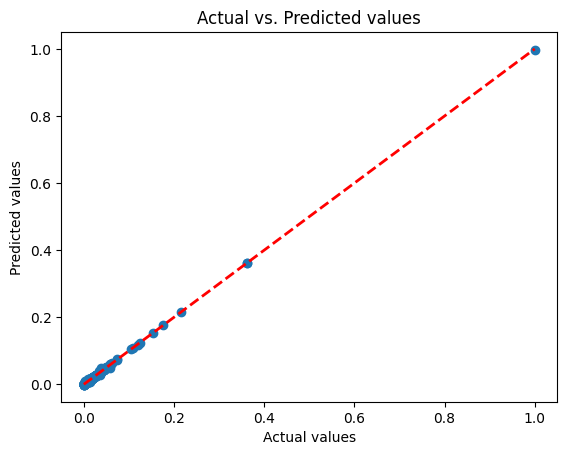

In [65]:
# Checking if there is overfitting
import matplotlib.pyplot as plt

plt.scatter(y, y_pred_dtr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', linewidth=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs. Predicted values")
plt.show()

In [55]:
# Evaluation with KFolds
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

def ensemble_predict(X):
    return sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on the ensemble model
scores_ensemble = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    tree_reg1.fit(X_train, y_train)
    tree_reg2.fit(X_train, y_train)
    tree_reg3.fit(X_train, y_train)

    y_pred_ensemble = ensemble_predict(X_test)

    # Calculate the MSE for this fold
    mse = mean_squared_error(y_test, y_pred_ensemble)
    scores_ensemble.append(mse)

# Calculate the average MSE for the ensemble model
average_mse_ensemble = np.mean(scores_ensemble)

# Print the cross-validation MSE scores and average MSE for the ensemble model
print("Cross-validation MSE scores for Ensemble Model:", scores_ensemble)
print("Average MSE for Ensemble Model:", average_mse_ensemble)

Cross-validation MSE scores for Ensemble Model: [0.0026438880222897105, 0.0008291555217530412, 0.00998543946667925, 0.0019440081157344109, 0.004795185581276714, 0.0016142116048284696, 0.021937455267694198, 0.0011275171741439703, 0.0018352062774781124, 0.005109719185875909]
Average MSE for Ensemble Model: 0.005182178621775379


In [24]:
# Conclusion: there might be a slight degree of overfitting in the ensemble model, as it performs slightly better on the 
# training data than on unseen data in cross-validation. It is not severe enough to render the model useless. 
# The model is likely to provide reasonable predictions on new, unseen data, given the information available during 
# training. It's common to have some level of overfitting, especially when dealing with complex models and real-world data.

In [25]:
# Apllying the model on world data 

In [26]:
world_predictions = pd.read_excel('world data.xlsx')
world_predictions.head()

,country,gdp,taxrev%gdp,totalrev,population,unemployment,gini,tax_sales,crime_rate_per1000,income_capita,bachelor_degree,highschool,tobacco_smokers,poverty,median_age,price,alcolism_rate
0,Argentina,487227339103,11.48,5.593370e+10,45510318,0.115,0.423,21.0,4.38,9960,35.7,63.7,24.5,35.5,32.4,5.76,6.8
1,Australia,1542660000000,23.13,3.568173e+11,26177413,0.065,0.343,10.0,4.00,57170,49.3,83.7,13.6,12.4,37.5,10.06,4.4
2,Belgium,599879000000,23.36,1.401317e+11,11655930,0.055,0.272,21.0,4.34,50490,42.4,79.7,23.4,14.8,41.6,9.45,8.1
3,Brazil,1608981000000,14.68,2.361984e+11,203062512,0.137,0.489,17.0,6.50,7740,20.1,57.0,12.8,26.5,33.2,4.30,4.2
4,Canada,1988336331717,13.35,2.654429e+11,38454327,0.095,0.333,5.0,3.66,48310,60.0,92.5,13.0,11.6,41.8,6.91,8.0


In [27]:
# Dropping columns to have the have data
columns_to_drop3 = ['country', 'taxrev%gdp', 'gdp']
wp = world_predictions.drop(columns=columns_to_drop3)
wp.head()

,totalrev,population,unemployment,gini,tax_sales,crime_rate_per1000,income_capita,bachelor_degree,highschool,tobacco_smokers,poverty,median_age,price,alcolism_rate
0,5.593370e+10,45510318,0.115,0.423,21.0,4.38,9960,35.7,63.7,24.5,35.5,32.4,5.76,6.8
1,3.568173e+11,26177413,0.065,0.343,10.0,4.00,57170,49.3,83.7,13.6,12.4,37.5,10.06,4.4
2,1.401317e+11,11655930,0.055,0.272,21.0,4.34,50490,42.4,79.7,23.4,14.8,41.6,9.45,8.1
3,2.361984e+11,203062512,0.137,0.489,17.0,6.50,7740,20.1,57.0,12.8,26.5,33.2,4.30,4.2
4,2.654429e+11,38454327,0.095,0.333,5.0,3.66,48310,60.0,92.5,13.0,11.6,41.8,6.91,8.0


In [28]:
wp['revenue_per_capita'] = wp['totalrev'] / wp['population']
wp.head()

,totalrev,population,unemployment,gini,tax_sales,crime_rate_per1000,income_capita,bachelor_degree,highschool,tobacco_smokers,poverty,median_age,price,alcolism_rate,revenue_per_capita
0,5.593370e+10,45510318,0.115,0.423,21.0,4.38,9960,35.7,63.7,24.5,35.5,32.4,5.76,6.8,1229.033349
1,3.568173e+11,26177413,0.065,0.343,10.0,4.00,57170,49.3,83.7,13.6,12.4,37.5,10.06,4.4,13630.730355
2,1.401317e+11,11655930,0.055,0.272,21.0,4.34,50490,42.4,79.7,23.4,14.8,41.6,9.45,8.1,12022.355522
3,2.361984e+11,203062512,0.137,0.489,17.0,6.50,7740,20.1,57.0,12.8,26.5,33.2,4.30,4.2,1163.180779
4,2.654429e+11,38454327,0.095,0.333,5.0,3.66,48310,60.0,92.5,13.0,11.6,41.8,6.91,8.0,6902.809670


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (Representative Population Values):
 [[2.18707135e+07]
 [1.42153026e+09]
 [2.75501339e+08]
 [1.32056377e+08]
 [6.27667308e+07]
 [2.03062512e+08]
 [3.38289857e+08]
 [8.84025680e+06]
 [8.33698430e+07]
 [4.58450423e+07]]


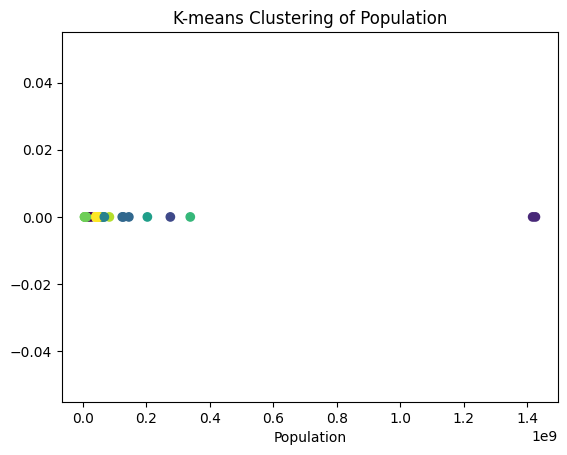

In [29]:
from sklearn.cluster import KMeans
import numpy as np

population_values = wp['population'].values.reshape(-1, 1)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(population_values)

labels = kmeans.labels_

# Adding population clusters as a new column in the original DataFrame
wp['population_group'] = labels

# Print the cluster centers (representative population values for each cluster)
print("Cluster Centers (Representative Population Values):\n", kmeans.cluster_centers_)

# Visualizing the clusters using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(wp['population'], np.zeros(len(wp)), c=labels, cmap='viridis')
plt.xlabel('Population')
plt.title('K-means Clustering of Population')
plt.show()

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (Representative Revenue Values):
 [[5.74388909e+10]
 [1.43645907e+12]
 [2.61828355e+12]
 [5.29595323e+11]
 [2.64165704e+11]
 [1.95474516e+11]
 [7.09003778e+11]
 [3.68986333e+11]
 [1.25571986e+11]
 [8.23865489e+11]]


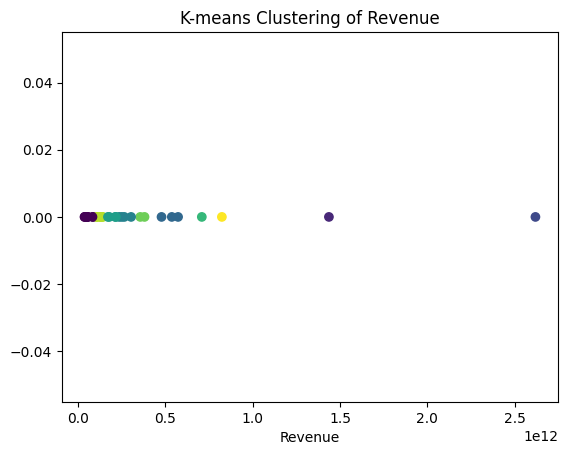

In [30]:
from sklearn.cluster import KMeans
import numpy as np

revenue_values = wp['totalrev'].values.reshape(-1, 1)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(revenue_values)

labels = kmeans.labels_

# Adding population clusters as a new column in the original DataFrame
wp['revenue_group'] = labels

# Print the cluster centers (representative population values for each cluster)
print("Cluster Centers (Representative Revenue Values):\n", kmeans.cluster_centers_)

# Visualizing the clusters using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(wp['totalrev'], np.zeros(len(wp)), c=labels, cmap='viridis')
plt.xlabel('Revenue')
plt.title('K-means Clustering of Revenue')
plt.show()

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (Representative Violence Values):
 [[7.61      ]
 [3.868     ]
 [5.715     ]
 [4.64642857]
 [6.4375    ]]


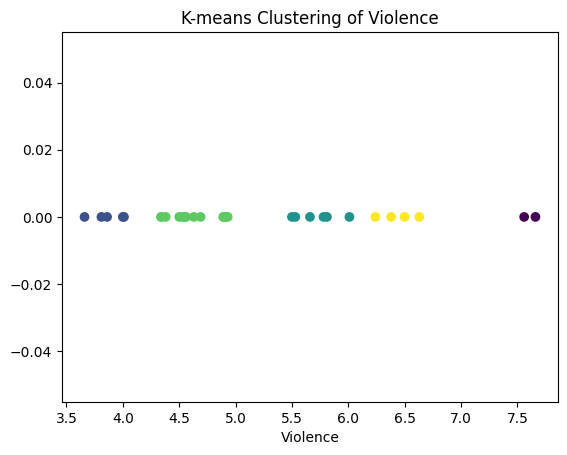

In [31]:
from sklearn.cluster import KMeans
import numpy as np

violence_values = wp['crime_rate_per1000'].values.reshape(-1, 1)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(violence_values)

labels = kmeans.labels_

# Adding population clusters as a new column in the original DataFrame
wp['violence_group'] = labels

# Print the cluster centers (representative population values for each cluster)
print("Cluster Centers (Representative Violence Values):\n", kmeans.cluster_centers_)

# Visualizing the clusters using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(wp['crime_rate_per1000'], np.zeros(len(wp)), c=labels, cmap='viridis')
plt.xlabel('Violence')
plt.title('K-means Clustering of Violence')
plt.show()

In [32]:
wp.shape

(31, 18)

In [33]:
scaler = MinMaxScaler()

scaler.fit(wp)

wp_scaled = scaler.transform(wp)
wp = pd.DataFrame(wp_scaled, columns=wp.columns)
wp.head()

,totalrev,population,unemployment,gini,tax_sales,crime_rate_per1000,income_capita,bachelor_degree,highschool,tobacco_smokers,poverty,median_age,price,alcolism_rate,revenue_per_capita,population_group,revenue_group,violence_group
0,0.007058,0.028495,0.337079,0.450928,0.777778,0.180,0.088298,0.508097,0.450262,0.549828,0.566161,0.213592,0.063797,0.294118,0.040562,1.000000,0.000000,0.75
1,0.123654,0.014888,0.149813,0.238727,0.370370,0.085,0.622046,0.783401,0.799302,0.175258,0.065076,0.461165,0.251694,0.176471,0.564511,0.000000,0.777778,0.25
2,0.039686,0.004668,0.112360,0.050398,0.777778,0.170,0.546523,0.643725,0.729494,0.512027,0.117137,0.660194,0.225039,0.357843,0.496560,0.777778,0.888889,0.75
3,0.076913,0.139380,0.419476,0.625995,0.629630,0.710,0.063200,0.192308,0.333333,0.147766,0.370933,0.252427,0.000000,0.166667,0.037779,0.555556,0.444444,1.00
4,0.088245,0.023529,0.262172,0.212202,0.185185,0.000,0.521877,1.000000,0.952880,0.154639,0.047722,0.669903,0.114049,0.352941,0.280268,1.000000,0.444444,0.25


In [66]:
# Applying the model with the best results
predictions = pd.Series([tree.predict(wp) for tree in (tree_reg1, tree_reg2, tree_reg3)]).sum(axis=0)
print(predictions)

[0.1285591  0.17544225 0.00625375 0.05065846 0.15573741 0.36524648
 0.04310159 0.0092542  0.0028961  0.36141639 0.34271574 0.00241647
 0.0092542  0.36493866 0.0518178  0.0028961  0.36457275 0.36157117
 0.06001001 0.36149512 0.0028961  0.12541003 0.0051549  0.10446014
 0.05752517 0.36381126 0.12602857 0.00379742 0.00379742 0.16940838
 0.97849645]


In [67]:
# Minimum and maximum values for the original cannabisrev
min_value = 37448.46
max_value = 719145671.5

# Inverse transform the predictions
predictions_inverse = (predictions * (max_value - min_value)) + min_value

# Format the values as strings with normal notation
predictions_formatted = ['{:.2f}'.format(value) for value in predictions_inverse]

print(predictions_formatted)

['92485354.21', '126199410.57', '4534569.53', '36466365.77', '112029502.53', '262689195.37', '31032159.26', '6692221.23', '2120060.94', '259934945.80', '246487154.17', '1775153.74', '6692221.23', '262467839.95', '37300057.91', '2120060.94', '262204708.95', '260046250.18', '43191137.52', '259991559.53', '2120060.94', '90220835.05', '3744379.82', '75155592.76', '41404274.44', '261657115.90', '90665626.60', '2768205.29', '2768205.29', '121860404.58', '703682294.81']


In [36]:
# Scaling: This process is particularly important when dealing with variables that have different units or widely varying 
# magnitudes. 

# While the concept of min-max scaling is widely used in data analysis and machine learning, it doesn't have a single 
# creator or specific origin. 
# It is a simple mathematical operation that has been widely adopted in the field as a means to normalize data across a 
# consistent range. 
# When you apply the min-max scaling technique to the results of a model, it can be considered a form of feature scaling. 
# Feature scaling is a general term used to describe the process of transforming numerical features in a dataset to a 
# specific range or scale.
# By dividing the maximum value by the minimum value and multiplying the result to scale the predictions, you are effectively
# rescaling the predictions to a specific range determined by the maximum and minimum values of the cannabis revenue. 
# This process helps ensure that the predictions fall within a consistent and comparable range, which can be useful for 
# analysis and interpretation.

In [68]:
# Making the magnitude adjustment
# Using Canada´s real result and Canada´s prediction result as the adjustment factor
adjustment_factor = 2876070000 / 112029502.53
 
predictions_formatted = np.array(predictions_formatted, dtype=float)
predictions_adjusted = predictions_formatted * adjustment_factor
print(predictions_adjusted)


[2.37432414e+09 3.23984603e+09 1.16413437e+08 9.36180365e+08
 2.87607000e+09 6.74387101e+09 7.96671058e+08 1.71805607e+08
 5.44271244e+07 6.67316272e+09 6.32792518e+09 4.55725171e+07
 1.71805607e+08 6.73818828e+09 9.57583272e+08 5.44271244e+07
 6.73143306e+09 6.67602017e+09 1.10882162e+09 6.67461613e+09
 5.44271244e+07 2.31618843e+09 9.61273435e+07 1.92942699e+09
 1.06294850e+09 6.71737502e+09 2.32760731e+09 7.10665674e+07
 7.10665674e+07 3.12845318e+09 1.80652372e+10]


In [38]:
# Using the real-world data as the adjustment factor is mathematically more accurate and appropriate than using the ratios of 
# different datasets. Dividing the city ratio by the country ratio could potentially introduce inaccuracies, as it 
# assumes a linear relationship between the two ratios, which may not be the case.

# The real-world data represents the ground truth or the actual values I am trying to predict. By directly using the 
# real-world data as the adjustment factor, I am aligning the predictions with the actual outcomes, which is the ultimate
# goal of any prediction model.

# In contrast, using the ratio of city cannabis data to country cannabis data as an adjustment factor might not capture the 
# full complexity of the relationship between the two datasets. Additionally, it assumes that the scaling relationship 
# remains constant across all data points, which may not be the case when dealing with different geographical levels 
# (city vs. country) and different contexts.

In [69]:
predictions_adjusted = pd.DataFrame(predictions_adjusted, columns=['Prediction'])
pd.set_option('display.float_format', '{:.2f}'.format)
print(predictions_adjusted)

       Prediction
0   2374324143.87
1   3239846027.71
2    116413436.58
3    936180365.28
4   2876070000.00
5   6743871007.78
6    796671057.78
7    171805607.26
8     54427124.37
9   6673162717.71
10  6327925175.82
11    45572517.08
12   171805607.26
13  6738188275.39
14   957583271.64
15    54427124.37
16  6731433062.18
17  6676020172.05
18  1108821623.61
19  6674616129.95
20    54427124.37
21  2316188425.39
22    96127343.47
23  1929426988.32
24  1062948499.27
25  6717375015.79
26  2327607307.06
27    71066567.36
28    71066567.36
29  3128453183.18
30 18065237209.21


In [70]:
World_Predictions = pd.DataFrame({'Country': world_predictions['country'], 'Prediction': predictions_adjusted.iloc[:, 0]})

World_Predictions.set_index(World_Predictions.index + 1, inplace=True)

World_Predictions.head(35)

,Country,Prediction
1,Argentina,2374324143.87
2,Australia,3239846027.71
3,Belgium,116413436.58
4,Brazil,936180365.28
5,Canada,2876070000.00
6,China,6743871007.78
7,Colombia,796671057.78
8,Czech Republic,171805607.26
9,Denmark,54427124.37
10,France,6673162717.71


In [71]:
World_Predictions.reset_index(drop=True, inplace=True)
world_predictions.reset_index(drop=True, inplace=True)
result_df = world_predictions.merge(World_Predictions[['Prediction']], left_index=True, right_index=True)
result_df.head()

,country,gdp,taxrev%gdp,totalrev,population,unemployment,gini,tax_sales,crime_rate_per1000,income_capita,bachelor_degree,highschool,tobacco_smokers,poverty,median_age,price,alcolism_rate,Prediction
0,Argentina,487227339103,11.48,55933698529.00,45510318,0.12,0.42,21.00,4.38,9960,35.70,63.70,24.50,35.50,32.40,5.76,6.80,2374324143.87
1,Australia,1542660000000,23.13,356817258000.00,26177413,0.07,0.34,10.00,4.00,57170,49.30,83.70,13.60,12.40,37.50,10.06,4.40,3239846027.71
2,Belgium,599879000000,23.36,140131734400.00,11655930,0.06,0.27,21.00,4.34,50490,42.40,79.70,23.40,14.80,41.60,9.45,8.10,116413436.58
3,Brazil,1608981000000,14.68,236198410800.00,203062512,0.14,0.49,17.00,6.50,7740,20.10,57.00,12.80,26.50,33.20,4.30,4.20,936180365.28
4,Canada,1988336331717,13.35,265442900284.22,38454327,0.10,0.33,5.00,3.66,48310,60.00,92.50,13.00,11.60,41.80,6.91,8.00,2876070000.00


In [73]:
result_df.to_excel('result_df.xlsx', index=False)